# Linear Regression with Solutions to Selected Exercises

Additional details have been added to the Lab from chapter 3 below regarding how we are making decisions on improving the least-squares models being fit to the <code> Boston </code> dataset along with solutions to selected exercises (exercises were selected based on whether they were more applicative than conceptual).

### Loading in the Boston Dataset

In [402]:
# While exercises with the Boston dataset have been performed below for demonstration of linear regression exercises in the lab,
# this dataset is not quality! See the notes below provided from sklearn
from sklearn.datasets import load_boston
df_Boston = load_boston()

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [276]:
# Necessary Library Imports
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import ModelSpec as MS, summarize, poly

# Load in Boston Data Set
Boston = load_data("Boston")
print("Boston Dataset Dimensions: ", Boston.shape)
Boston.head()

Boston Dataset Dimensions:  (506, 13)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


### Fitting a Single Linear Regression Model to Predict medv

In [277]:
# Load our single feature and intercept into a pandas dataframe
X = pd.DataFrame({'intercept': np.ones(Boston.shape[0]),
                  'lstat': Boston['lstat']})

# Set the response variable
y = Boston['medv']

# Create an Ordinary Least Squares Regression Model
model = sm.OLS(y, X)

# Fit the model and output the model summary
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           5.08e-88
Time:                        19:21:32   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- This single linear regression model doesn't have great predictive power
- $ R^2 $ is only 0.54, meaning we can't explain almost half the variation in our reponse variable medv

### Graphing the Linear Regression on top of the Scatter Plot

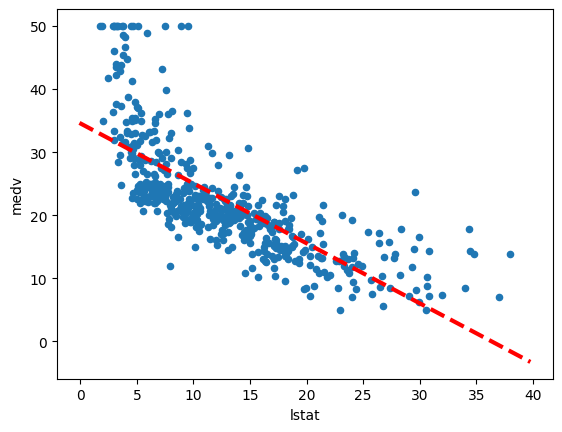

In [278]:
# Create a transform object for our predictor variable
design = MS(['lstat'])
X = design.fit_transform(Boston) # standardizes lstat for model matrix

# define a function to add a line to a plot
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

ax = Boston.plot.scatter('lstat', 'medv')
abline(ax,
       results.params[0],
       results.params[1],
       'r--',
       linewidth=3)

### Graphing Fitted Values from the Regression against Residuals

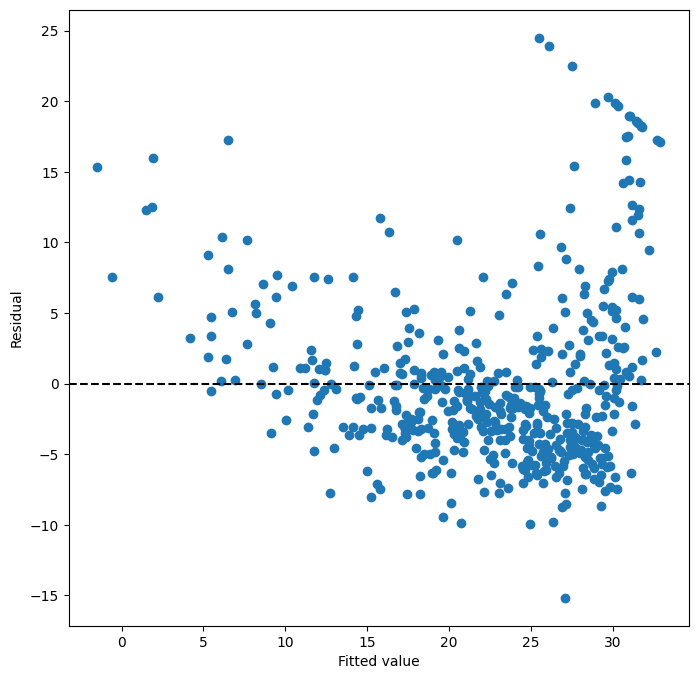

In [279]:
# create a subplot object
ax = subplots(figsize=(8,8))[1]

# scatter the fitted values against the residuals
ax.scatter(results.fittedvalues, results.resid)

# add labels to the graph
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')

# add a horizontal line at 0
ax.axhline(0, c='k', ls='--');

- It appears there is some sort of pattern here since we do not have an approximately, equally random distribution above and below zero
- It follows that linear regression may not be the best choice to model the relationship between lstat and medv

### Examining Leverage Statistics to Identify Outliers

The leverage of the $i^{th}$ observation is defined by the $ \text{Hat Matrix} $:

$$ h_{ii} = \frac{\partial\hat{y}_i}{\partial{y}_i}= [H]_{ii} = x_i^\top(X^{\top}X)^{-1}x_i $$

$h_{ii}$ represents the influence that the $i^{th}$ measured value ($y_i$) has over the $i^{th}$ fitted value ($\hat{y}_i$).

It's common to use an outlier threshold of twice the average leverage i.e. $x_i$ is an outlier if $h_{ii} > 2\bar{h}$, 

We can access these influences from the <code> get_influence() </code> method and graph our threshold and highlight outlier values below.


Outlier Threshold set to 0.007905
Observation 374 has maximum leverage of 0.026865
34 observations identified as outliers representing 6.72% of the dataset


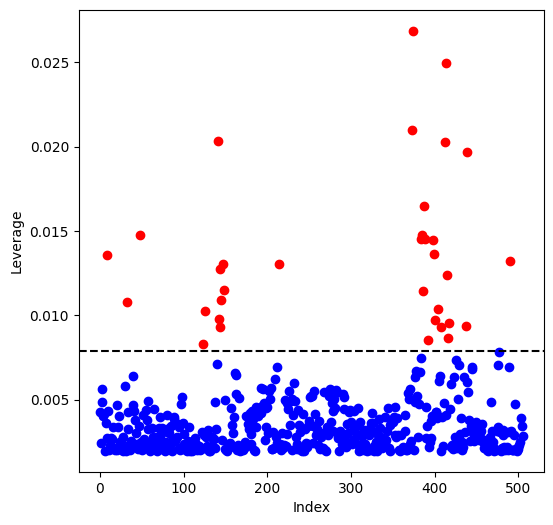

In [280]:

def leverage_outlier_plot(res, mean_lvg_multiple, *args, **kwargs):
    " plots the leverage statistics of a regression model according to a certain mean_lvg_multiple "
    # get the influence from results
    infl = res.get_influence()
    
    # create a subplot object
    ax = subplots(figsize=(6,6))[1]
    
    # set outlier threshold to twice the mean leverage and index key for highlighting scatter plot values
    outlier_thresh = mean_lvg_multiple*np.mean(infl.hat_matrix_diag)
    thresh_idx = infl.hat_matrix_diag > outlier_thresh
    
    # scatter the influence values against the index of our data while highlighting outliers in red
    ax.scatter(np.arange(X.shape[0])[thresh_idx], infl.hat_matrix_diag[thresh_idx], c='red')
    ax.scatter(np.arange(X.shape[0])[~thresh_idx], infl.hat_matrix_diag[~thresh_idx], c='blue')
    
    # set graph labels
    ax.set_xlabel('Index')
    ax.set_ylabel('Leverage')
    
    # add a horizontal line at twice the mean leverage
    ax.axhline(outlier_thresh, c='k', ls='--');

    # Print outlier threshold
    print("Outlier Threshold set to %f" % outlier_thresh)
    
    # print the index of the observation with the most influence
    print("Observation %d has maximum leverage of %f" % (np.argmax(infl.hat_matrix_diag), infl.hat_matrix_diag.max()))
    
    #print proportion of observations identified as outliers
    print("%d observations identified as outliers representing %.02f%% of the dataset" % (thresh_idx.sum(), 100*thresh_idx.sum()/X.shape[0]))

leverage_outlier_plot(results, 2)

### Extending the Regression Model to Multiple Predictor Variables

In [281]:
# Drop the response variable from our model spec terms which we then transform
terms = Boston.columns.drop('medv')
X = MS(terms).fit_transform(Boston)

# Create and fit a model
model = sm.OLS(y, X)
results = model.fit()

# Output the summary of the Multiple Linear Regression Model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Sun, 21 Apr 2024   Prob (F-statistic):          2.23e-133
Time:                        19:21:34   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     41.6173      4.936      8.431      0.000      31.919      51.316
crim          -0.1214      0.033     -3.678      0.000      -0.186      -0.057
zn             0.0470      0.014      3.384      0.001       0.020       0.074
indus          0.0135      0.062      0.217      0.829      -0.109       0.136
chas           2.8400      0.870      3.264      0.001       1.131       4.549
nox          -18.7580      3.851     -4.870      0.000     -26.325     -11.191
rm             3.6581      0.420      8.705      0.000       2.832       4.484
age            0.0036      0.013      0.271      0.787      -0.023       0.030
dis           -1.4908      0.202     -7.394      0.000      -1.887      -1.095
rad            0.2894      0.067      4.325      0.000       0.158       0.421
tax           -0.0127      0.004     -3.337      0.001      -0.020      -0.005
ptratio       -0.9375      0.132     -7.091      0.000      -1.197      -0.678
lstat         -0.5520      0.051    -10.897      0.000      -0.652      -0.452
==============================================================================
Omnibus:                      171.096   Durbin-Watson:                   1.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              709.937
Skew:                           1.477   Prob(JB):                    6.90e-155
Kurtosis:                       7.995   Cond. No.                     1.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We see strong evidence that indus and age are worth dropping from the model which is done below.

In [282]:
# Drop the response variable from our model spec terms which we then transform
terms = Boston.columns.drop(['medv','indus','age'])
X = MS(terms).fit_transform(Boston)

# Create and fit a model
model = sm.OLS(y, X)
results = model.fit()

# Output the summary of the Multiple Linear Regression Model
print("Residual Squared Error: %.04f" % np.sqrt(results.scale))
results.summary()

Residual Squared Error: 4.7889


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     136.8
Date:                Sun, 21 Apr 2024   Prob (F-statistic):          1.73e-135
Time:                        19:21:34   Log-Likelihood:                -1505.0
No. Observations:                 506   AIC:                             3032.
Df Residuals:                     495   BIC:                             3078.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     41.4517      4.903      8.454      0.000      31.818      51.086
crim          -0.1217      0.033     -3.696      0.000      -0.186      -0.057
zn             0.0462      0.014      3.378      0.001       0.019       0.073
chas           2.8719      0.863      3.329      0.001       1.177       4.567
nox          -18.2624      3.565     -5.122      0.000     -25.267     -11.258
rm             3.6730      0.409      8.978      0.000       2.869       4.477
dis           -1.5160      0.188     -8.078      0.000      -1.885      -1.147
rad            0.2839      0.064      4.440      0.000       0.158       0.410
tax           -0.0123      0.003     -3.608      0.000      -0.019      -0.006
ptratio       -0.9310      0.130     -7.138      0.000      -1.187      -0.675
lstat         -0.5465      0.047    -11.519      0.000      -0.640      -0.453
==============================================================================
Omnibus:                      172.594   Durbin-Watson:                   1.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              725.971
Skew:                           1.486   Prob(JB):                    2.28e-158
Kurtosis:                       8.060   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As we can see in the notes, the condition number suggests possible multicollinearity interfering with the model which we examine next.

### MultiCollinearity 

To assess multicollinearity, we compute the variance inflation factor for each of our variables which measures if one predictor has a significant relationship with our other predictors. Mathematically,

$$ \text{VIF}(\hat{\beta}_j) = \frac{1}{1-\text{R}_{X_j|X_{j-1}}^2}$$

In [283]:
# Compute VIF for predictors and load into a list
vals = [VIF(X, i) for i in range(1, X.shape[1])]

# Create a dataframe with VIFs for each predictor
vif = pd.DataFrame({'Variance_Inflation_Factor':vals}, index=X.columns[1:])
vif

,Variance_Inflation_Factor
crim,1.765478
zn,2.239107
chas,1.056997
nox,3.758338
rm,1.819577
dis,3.438955
rad,6.826385
tax,7.258419
ptratio,1.755565
lstat,2.527415


Commonly, VIFs exceeding 5 or 10 indicates problematic collinearity in the model. Here, we see that rad and tax both exceed a VIF of 5, so we start by excluding the predictor with the highest VIF (tax) from the model.

In [284]:
# Drop the response variable from our model spec terms which we then transform
terms = Boston.columns.drop(['medv','indus','age','tax'])
X = MS(terms).fit_transform(Boston)

# Create and fit a model
model = sm.OLS(y, X)
results = model.fit()

# Output the summary of the Multiple Linear Regression Model
print("Residual Squared Error: %.04f" % np.sqrt(results.scale))
results.summary()

Residual Squared Error: 4.8466


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     146.9
Date:                Sun, 21 Apr 2024   Prob (F-statistic):          8.23e-134
Time:                        19:21:34   Log-Likelihood:                -1511.5
No. Observations:                 506   AIC:                             3043.
Df Residuals:                     496   BIC:                             3085.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9841      4.945      8.085      0.000      30.268      49.700
crim          -0.1185      0.033     -3.559      0.000      -0.184      -0.053
zn             0.0366      0.014      2.695      0.007       0.010       0.063
chas           3.1394      0.870      3.610      0.000       1.431       4.848
nox          -21.3757      3.501     -6.106      0.000     -28.254     -14.497
rm             3.8506      0.411      9.368      0.000       3.043       4.658
dis           -1.4508      0.189     -7.674      0.000      -1.822      -1.079
rad            0.1046      0.041      2.569      0.010       0.025       0.185
ptratio       -1.0018      0.130     -7.677      0.000      -1.258      -0.745
lstat         -0.5535      0.048    -11.537      0.000      -0.648      -0.459
==============================================================================
Omnibus:                      160.486   Durbin-Watson:                   1.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              623.744
Skew:                           1.400   Prob(JB):                    3.59e-136
Kurtosis:                       7.663   Cond. No.                         774.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [285]:
## CHECKING VIFs after removal of predictor 'tax'
# Compute VIF for predictors and load into a list
vals = [VIF(X, i) for i in range(1, X.shape[1])]

# Create a dataframe with VIFs for each predictor
vif = pd.DataFrame({'Variance_Inflation_Factor':vals}, index=X.columns[1:])
vif

,Variance_Inflation_Factor
crim,1.764257
zn,2.154051
chas,1.049185
nox,3.538215
rm,1.793239
dis,3.407113
rad,2.701027
ptratio,1.715836
lstat,2.523246


With a very slight decrease in $R^2$ from $0.734$ to $0.727$, and no VIFs exceeding 5 in the model, removing tax from the model is a reasonable decision.

### Adding Non-Linear Transformations to the Model

We saw earlier that there was evidence of a non-linear relationship between lstat and medv via the residual plot. Let's now model lstat as a quadratic term in our linear regression using function <code>poly()</code> and compare the results to the original model.

In [286]:
# 2-variable linear regression no transforms
X = MS(['lstat', 'age']).fit_transform(Boston)
model1 = sm.OLS(y, X)
results1 = model1.fit()

# 2-variable linear regression with a quadratic transform of lstat
X = MS([poly('lstat', degree=2), 'age']).fit_transform(Boston)
model3 = sm.OLS(y, X)
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     337.3
Date:                Sun, 21 Apr 2024   Prob (F-statistic):          7.03e-120
Time:                        19:21:35   Log-Likelihood:                -1561.0
No. Observations:                 506   AIC:                             3130.
Df Residuals:                     502   BIC:                             3147.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
intercept                   17.7151      0.781     22.681      0.000      16.181      19.250
poly(lstat, degree=2)[0]  -179.2279      6.733    -26.620      0.000    -192.456    -166.000
poly(lstat, degree=2)[1]    72.9908      5.482     13.315      0.000      62.220      83.761
age                          0.0703      0.011      6.471      0.000       0.049       0.092
==============================================================================
Omnibus:                       81.499   Durbin-Watson:                   1.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.528
Skew:                           0.918   Prob(JB):                     1.69e-34
Kurtosis:                       5.001   Cond. No.                     2.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Our zero $p$-value for the quadratic term's coefficient suggests that it improves the model initially. To compare the linear regression without transforms to that with the quadratic transform, we use the anlaysis of variance (ANOVA) test using funciton <code> anova_lm() </code>.

In [287]:
anova_lm(results1, results3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,503.0,19168.128609,0.0,NaN,NaN,NaN
1,502.0,14165.613251,1.0,5002.515357,177.278785,7.468491e-35


We see that we have a significant $\text{F}$-statistic of 177 indicating the model with the quadratic transformation improves our model.

## Solutions to Exercises

### Exercise 3.8

### (a) Use the <code> sm.OLS() </code> function to perform a simple linear regression with <code> mpg </code> as the response and <code> horsepower </code> as the predictor. Use the <code> summarize() </code> function to print the results. Comment on the output. For example:
- Is there a relationship between the predictor and the response?
- How strong is the relationship between the predictor and the response?
- Is the relationship between the predictor and the response positive or negative?
- What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?

In [288]:
# Read in the Auto dataset
df_auto = load_data("Auto")
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [289]:
# simple linear regression model 
X = MS(['horsepower']).fit_transform(df_auto)
y = df_auto['mpg']
model = sm.OLS(y, X)
results = model.fit()
print("Residual Squared Error: %.04f" % np.sqrt(results.scale))
results.summary()

Residual Squared Error: 4.9058


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           7.03e-81
Time:                        19:21:36   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Is there a relationship between the predictor and the response?

  <font color='red'> Yes. The effectively zero $p$-value indicates a relationship between predictor and response variables. </font>
- How strong is the relationship between the predictor and the response?

  <font color='red'> The strength of the relationship can be measured by the $R^2$ of $.606$. This is a decent proportion of the variation in the response variable explained; however, the level of accuracy desired in prediction of <code> mpg </code> could indicate this coefficient of deterimination is insufficient. </font>
- Is the relationship between the predictor and the response positive or negative?

  <font color='red'> Negative. This is due to the fact that $\hat{\beta}_{\text{horsepower}} < 0$. </font>
- What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?

  <font color='red'> Prediction and confidence/prediction intervals are output by the code below. </font>

In [290]:
# Use get_prediction to produce predicted value and confidence/prediction intervals
design = MS(['horsepower'])
X = design.fit_transform(df_auto)
pred_df = pd.DataFrame({'horsepower':[98]})
newX = design.transform(pred_df)
pred = results.get_prediction(newX)
print("Predicted MPG at 98 Horsepower: %.03f" % pred.predicted_mean)
ci = pred.conf_int(alpha=0.05)
print("95%% Confidence interval for MPG at 98 Horsepower: (%.03f, %.03f)" % (ci[0][0], ci[0][1]))
pi = pred.conf_int(alpha=0.05, obs=True)
print("95%% Prediction interval for MPG at 98 Horsepower: (%.03f, %.03f)" % (pi[0][0], pi[0][1]))

Predicted MPG at 98 Horsepower: 24.467
95% Confidence interval for MPG at 98 Horsepower: (23.973, 24.961)
95% Prediction interval for MPG at 98 Horsepower: (14.809, 34.125)


We see that there is a much wider range to our $95\%$ prediction interval compared to the confidence interval. This is expected since we are trying to predict a value for an invidivudal observation as opposed to the mean value predicted by the confidence interval.

### (b) Plot the response and the predictor in a new set of axes ax. Use the <code> ax.axline() </code> method or the <code> abline() </code> function defined in the lab to display the least squares regression line.

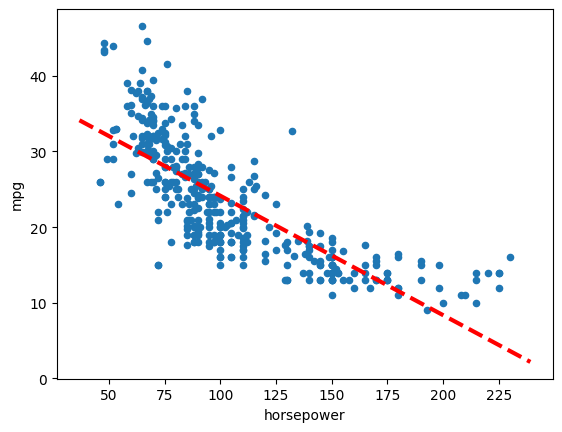

In [291]:
ax_1 = df_auto.plot.scatter('horsepower','mpg')
abline(ax_1,
       results.params[0],
       results.params[1],
       'r--',
       linewidth=3)

### (c) Produce some of diagnostic plots of the least squares regression fit as described in the lab. Comment on any problems you see with the fit.



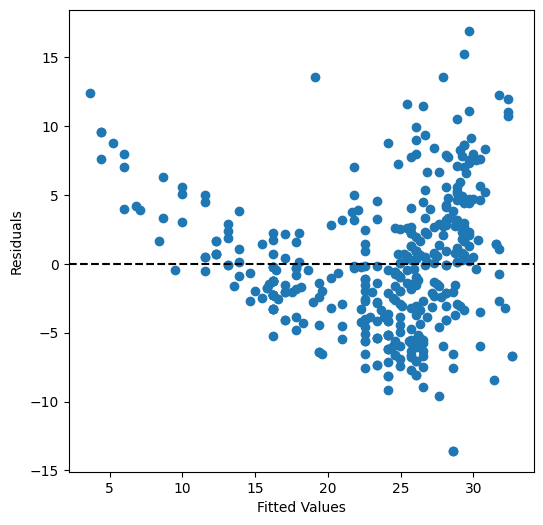

In [292]:
ax = subplots(figsize=(6,6))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted Values')
ax.axhline(0, c='k', ls='--')

<font color='red'> Both the original scatter plot and the residual plot don't support linearity. There is some sort of nonlinear relationship present. A leverage scatterplot is also produced below to see how much outlier presence exists. </font>

Outlier Threshold set to 0.010204
Observation 115 has maximum leverage of 0.029753
27 observations identified as outliers representing 6.89% of the dataset


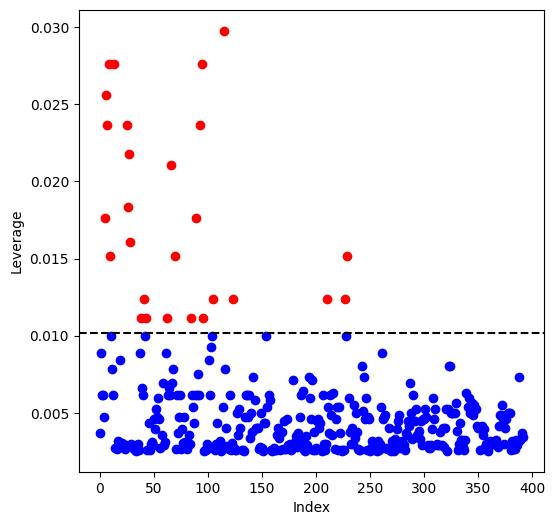

In [293]:
leverage_outlier_plot(results, 2)

### Exercise 3.9

### This question involves the use of multiple linear regression on the Auto data set.
### (a) Produce a scatterplot matrix which includes all of the variables in the data set.



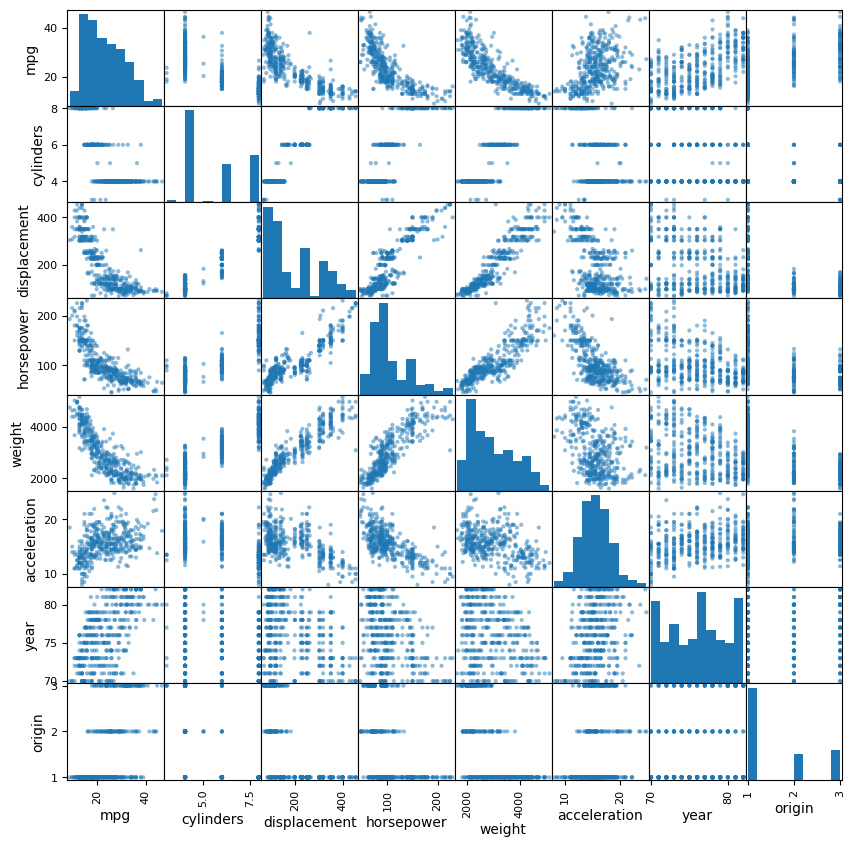

In [294]:
fig = pd.plotting.scatter_matrix(df_auto, figsize=(10,10))

### (b) Compute the matrix of correlations between the variables using the DataFrame.corr() method.


In [295]:
df_auto.corr(numeric_only=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


### (c) Use the <code> sm.OLS() </code> function to perform a multiple linear regression with <code> mpg </code> as the response and all other variables except <code> name </code> as the predictors. Use the <code> summarize() </code> function to print the results. Comment on the output. For instance:
- Is there a relationship between the predictors and the response?

  <font color='red'> $F$-statistic of $252.4$ suggests there is  relationship between these predictors and the response. </font>
- Which predictors appear to have a statistically significant relationship to the response?

  <font color='red'> cylinders, horsepower, and acceleration are the only variables which don't have a statistically significant relationship to the response in this model at the $\alpha=0.05$ level (also at the $\alpha=0.01$ level). </font>
- What does the coefficient for the year variable suggest?

  <font color='red'> With all other predictors held constant, a $1$ unit increase in <code> year </code> approximately increases the <code> mpg </code> by $0.7508$. </font>

In [296]:
# Multiple Linear Regression for questions in (c) above
terms = df_auto.columns.drop(['mpg','name'])
X = MS(terms).fit_transform(df_auto)
y = df_auto['mpg']
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sun, 21 Apr 2024   Prob (F-statistic):          2.04e-139
Time:                        19:21:42   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### (d) Produce some of diagnostic plots of the linear regression fit as described in the lab. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

<font color='red'> 
The results from the multiple linear regression above suggest that we have multicollinearity in our model. First, we will check the VIFs of our predictor variables and see if we can drop variables without sacrificing sufficient value in our $R^2$.
</font> 

In [297]:
# Compute VIF for predictors and load into a list
vals = [VIF(X, i) for i in range(1, X.shape[1])]

# Create a dataframe with VIFs for each predictor
vif = pd.DataFrame({'Variance_Inflation_Factor':vals}, index=X.columns[1:])
vif

,Variance_Inflation_Factor
cylinders,10.737535
displacement,21.836792
horsepower,9.943693
weight,10.831260
acceleration,2.625806
year,1.244952
origin,1.772386


<font color='red'> 
Let's first drop <code> displacement </code> since it has the highest VIF at $21.8$.
</font>

In [298]:
# Multiple Linear Regression for questions in (c) above
terms = df_auto.columns.drop(['mpg','displacement','name'])
X = MS(terms).fit_transform(df_auto)
y = df_auto['mpg']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Compute VIF for predictors and load into a list
vals = [VIF(X, i) for i in range(1, X.shape[1])]

# Create a dataframe with VIFs for each predictor
vif = pd.DataFrame({'Variance_Inflation_Factor':vals}, index=X.columns[1:])
vif

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     288.8
Date:                Sun, 21 Apr 2024   Prob (F-statistic):          3.67e-139
Time:                        19:21:42   Log-Likelihood:                -1027.0
No. Observations:                 392   AIC:                             2068.
Df Residuals:                     385   BIC:                             2096.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      -18.0915      4.669     -3.875   

,Variance_Inflation_Factor
cylinders,6.008253
horsepower,9.088413
weight,9.219674
acceleration,2.598356
year,1.239409
origin,1.594220


<font color='red'>
$R^2$ has only dropped from $0.821$ to $0.818$, so the model's predictive power has not suffered in a sufficient manner. We now don't have any variable with a VIF > 10. Let's also take a look at any pattern in the residual plot and examine potential outliers in our leverage plot below.
</font>

Outlier Threshold set to 0.035714
Observation 13 has maximum leverage of 0.135793
17 observations identified as outliers representing 4.34% of the dataset


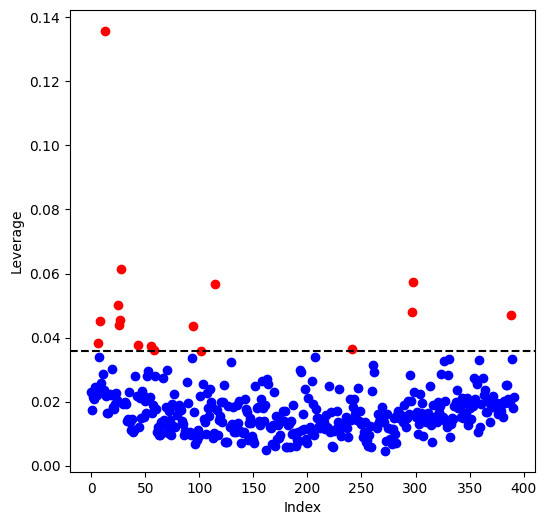

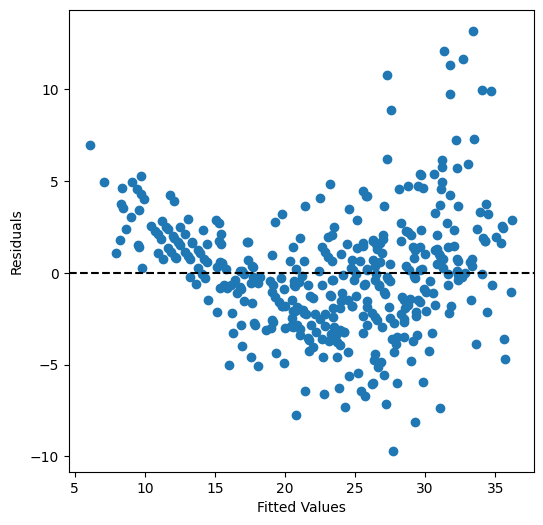

In [299]:
leverage_outlier_plot(results, 2)

ax = subplots(figsize=(6,6))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted Values')
ax.axhline(0, c='k', ls='--')

<font color='red'>
We see that fortunately we only have $4\%$ of observations identifying as outliers according to our outlier threshold of $2\bar{h}$; however, our residual plot suggests there is a nonlinear relationship present in our data. Let's see if we can remedy this issue by introducing interaction terms into the model below in part (e).
</font>

### (e) Fit some models with interactions as described in the lab. Do any interactions appear to be statistically significant?

<font color='red'>
We saw VIFs of about 10 for <code> cylinders</code>, <code> horsepower</code>, <code> weight</code>, and a VIF of about 22 for <code> displacement</code>.
As such, we will add $3$ interaction terms to our model with <code> displacement </code>and keep those with statistical significance.
</font> 

In [301]:
# Adding interaction terms for displacement, horsepower, and weight
df_auto['displacement-weight'] = df_auto['displacement']*df_auto['weight']
df_auto['displacement-horsepower'] = df_auto['displacement']*df_auto['horsepower']
df_auto['displacement-cylinders'] = df_auto['displacement']*df_auto['cylinders']
terms = df_auto.columns.drop(['mpg','name'])
X = MS(terms).fit_transform(df_auto)
y = df_auto['mpg']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     246.0
Date:                Sun, 21 Apr 2024   Prob (F-statistic):          1.96e-159
Time:                        19:22:43   Log-Likelihood:                -967.41
No. Observations:                 392   AIC:                             1957.
Df Residuals:                     381   BIC:                             2000.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
intercept                 

<font color='red'>
From here, we drop variables which don't have statistical significance and refit the model.
</font>

In [304]:
terms = df_auto.columns.drop(['mpg','name','acceleration','displacement-cylinders','cylinders'])
X = MS(terms).fit_transform(df_auto)
y = df_auto['mpg']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     349.1
Date:                Sun, 21 Apr 2024   Prob (F-statistic):          3.57e-162
Time:                        19:27:35   Log-Likelihood:                -969.86
No. Observations:                 392   AIC:                             1956.
Df Residuals:                     384   BIC:                             1987.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
intercept                 

<font color='red'>
We now have an $R^2 = 0.864$! Our best model yet.
</font>

### (f) Try a few different transformations of the variables, such as log(X), √X, X2. Comment on your findings.

<font color='red'>
First, let's reload our dataset and then check these variable transforms on <code> weight</code>, <code> displacement</code>, and <code> horsepower</code>. These are the three variables we can see from the pairwise scatterplot we did before that have the most evidence of nonlinear relationship with <code> mpg</code>.
</font>

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     430.5
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           2.48e-99
Time:                        19:50:05   Log-Likelihood:                -1132.4
No. Observations:                 392   AIC:                             2271.
Df Residuals:                     389   BIC:                             2283.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
intercept 

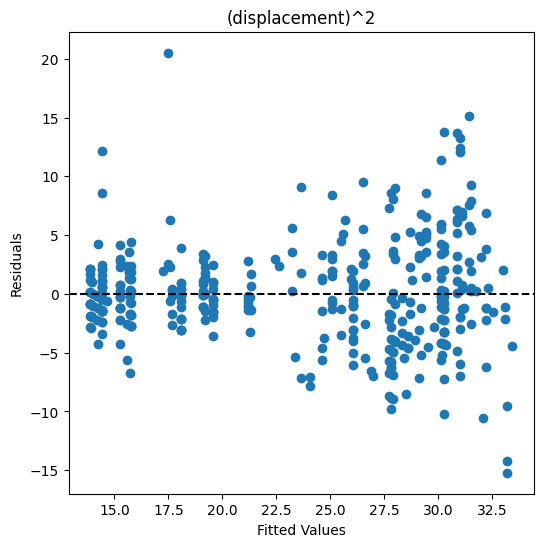

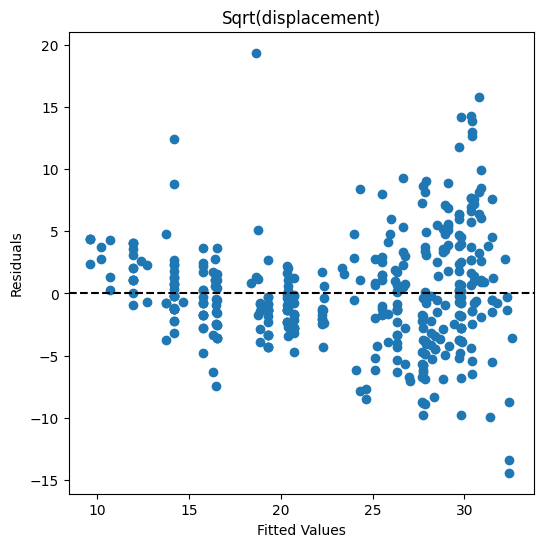

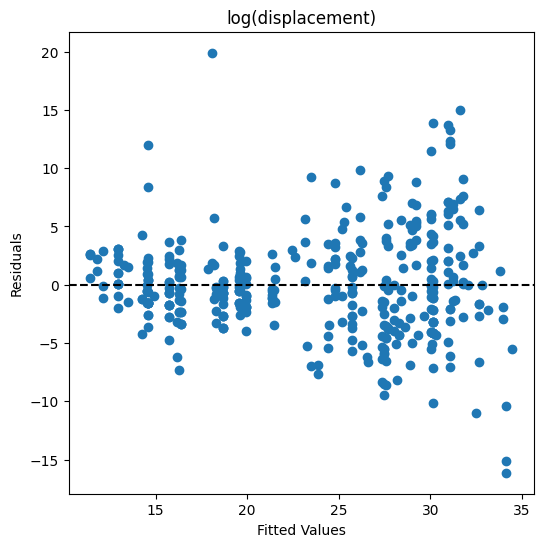

In [314]:
# reload the dataset first and create a copy to reuse for the following variable transformations
df_auto = load_data("Auto")
df_transform = df_auto.copy()

def square_sqrt_log_transform_resid_plots(df, trans_var, resp_var, *args, **kwargs):
    """ Produces Model Fits for a single linear regression for X^2, Sqrt(X), and log(X) for the transformed variable and response variable """
    # Fitting X^2 to displacement
    X = MS([poly(trans_var, degree=2)]).fit_transform(df_transform)
    y = df_transform[resp_var]
    model = sm.OLS(y, X)
    results = model.fit()
    print(results.summary())
    
    # plot residuals
    ax = subplots(figsize=(6,6))[1]
    ax.scatter(results.fittedvalues, results.resid)
    ax.set_title('(%s)^2' % trans_var)
    ax.set_ylabel('Residuals')
    ax.set_xlabel('Fitted Values')
    ax.axhline(0, c='k', ls='--')
    
    # Fitting sqrt(X) to displacement
    df_transform['sqrt_' + trans_var]  = np.sqrt(df_transform[trans_var])
    X = MS(['sqrt_' + trans_var]).fit_transform(df_transform)
    y = df_transform[resp_var]
    model = sm.OLS(y, X)
    results = model.fit()
    print(results.summary())
    
    # plot residuals
    ax = subplots(figsize=(6,6))[1]
    ax.scatter(results.fittedvalues, results.resid)
    ax.set_title('Sqrt(%s)' % trans_var)
    ax.set_ylabel('Residuals')
    ax.set_xlabel('Fitted Values')
    ax.axhline(0, c='k', ls='--')
    
    # Fitting log(X) to displacement
    df_transform['log_' + trans_var]  = np.log(df_transform[trans_var])
    X = MS(['log_' + trans_var]).fit_transform(df_transform)
    y = df_transform[resp_var]
    model = sm.OLS(y, X)
    results = model.fit()
    print(results.summary())
    
    # plot residuals
    ax = subplots(figsize=(6,6))[1]
    ax.scatter(results.fittedvalues, results.resid)
    ax.set_title('log(%s)' % trans_var)
    ax.set_ylabel('Residuals')
    ax.set_xlabel('Fitted Values')
    ax.axhline(0, c='k', ls='--')

# Model Fits and Residual Plots for Displacement
square_sqrt_log_transform_resid_plots(df_transform, 'displacement', 'mpg')

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           5.40e-99
Time:                        19:50:06   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
intercept     

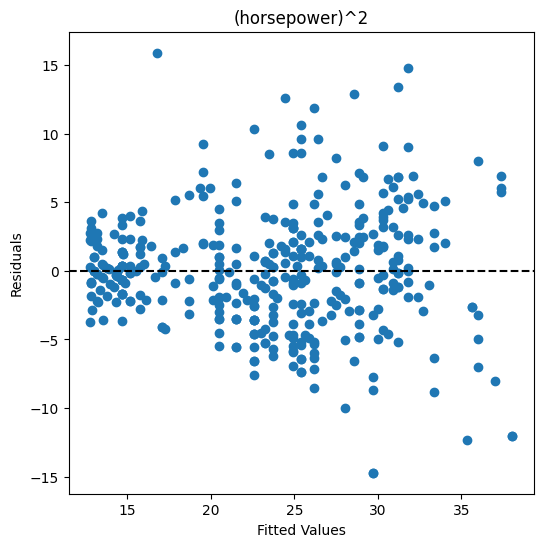

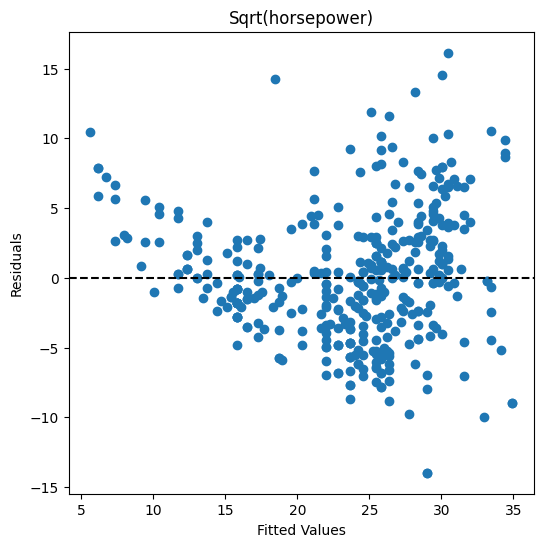

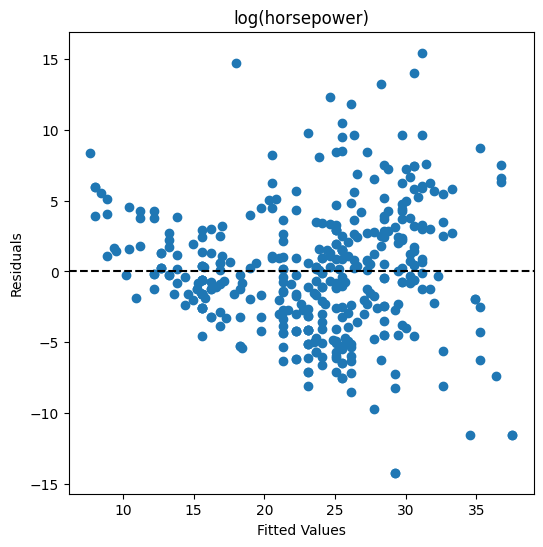

In [315]:
# Model Fits and Residual Plots for Horsepower
square_sqrt_log_transform_resid_plots(df_transform, 'horsepower', 'mpg')

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     488.3
Date:                Sun, 21 Apr 2024   Prob (F-statistic):          8.39e-107
Time:                        19:50:07   Log-Likelihood:                -1115.1
No. Observations:                 392   AIC:                             2236.
Df Residuals:                     389   BIC:                             2248.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
intercept             

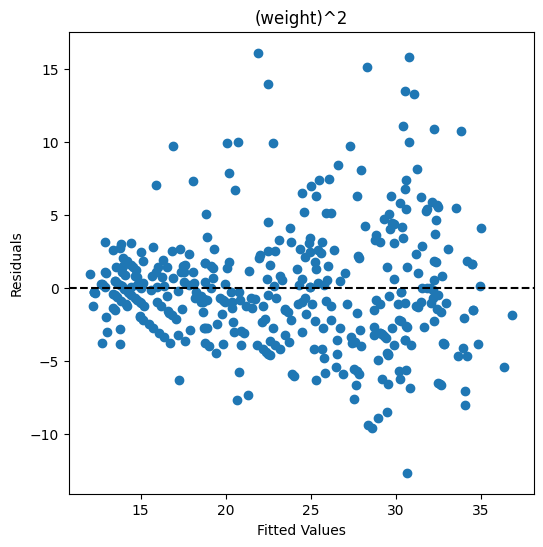

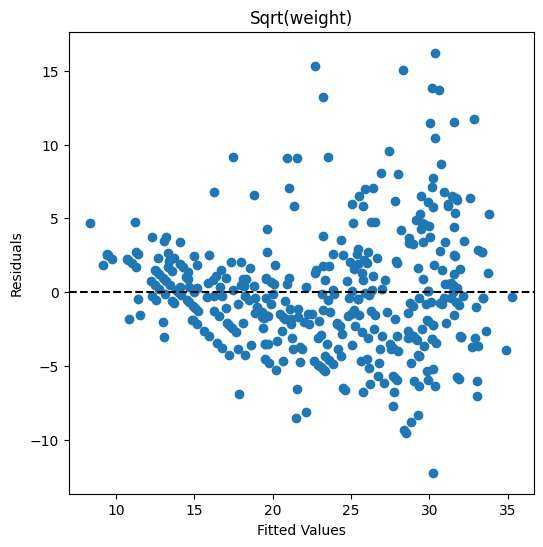

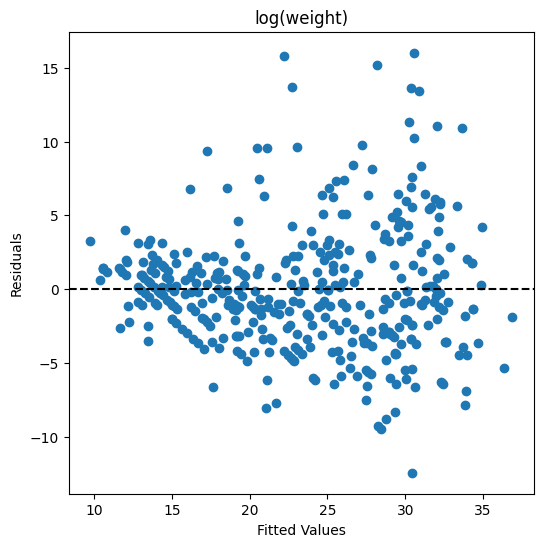

In [316]:
# Model Fits and Residual Plots for Weight
square_sqrt_log_transform_resid_plots(df_transform, 'weight', 'mpg')

<font color='red'>
Any given transform of each of these variables suggests it can model our response in a statistically significant manner. We can see that the quadratic transform for each of these variables seems to produce the best response/highest $R^2$ relative to <code> mpg</code>; however, upon examining the residual plots, we see that the residuals for a quadratic transform of <code> displacement </code> do not produce the same lack of pattern as seen for <code> horsepower </code> and <code> weight</code>. This could be a concern when electing whether or not to include it in the linear model. Across the board, these transforms suggests we should model these variables using transformations to improve linearity and predictive performance. One option that may help would be using a generalized linear model (GLM) which will be employed later on.
</font>

## 10. This question should be answered using the Carseats data set.
### (a) Fit a multiple regression model to predict Sales using Price, Urban, and US.


In [319]:
df_carseats = load_data("Carseats")
df_carseats.head()

def fit_model_print_results(df, X_vars, y_var, *args, **kwargs):
    """ fits a model y ~ X and prints the model summary """
    X = MS(X_vars).fit_transform(df)
    y = df[y_var]
    model = sm.OLS(y, X)
    results = model.fit()

    return results.summary()

fit_model_print_results(df_carseats, ['Price','Urban','US'], 'Sales')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           2.39e-23
Time:                        20:14:58   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0435      0.651     20.036      0.000      11.764      14.323
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban[Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### (b) Provide an interpretation of each coefficient in the model.

<font color='red'>
Assuming we hold other predictor variables constant in each case, for each unit increase in <code> Price</code>, <code> Sales</code> decreases by $.0545$ ($\beta_{Price} = -0.0545$). If <code> Urban</code> is yes, <code> Sales</code> decreases by $.0219$ ($\beta_{Urban} = -0.0219$). If <code> US</code> is yes, <code> Sales</code> increases by $1.2006$ ($\beta_{US} = 1.2006$)
</font>

### (d) For which of the predictors can you reject the null hypothesis $H_0: \beta_j = 0$?

<font color='red'>
We can reject $H_0$ for <code> Price</code> and <code> US</code>.
</font>

### (e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [320]:
fit_model_print_results(df_carseats, ['Price','US'], 'Sales')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           2.66e-24
Time:                        20:28:07   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0308      0.631     20.652      0.000      11.790      14.271
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
US[Yes]        1.1996      0.258      4.641      0.000       0.692       1.708
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### (f) How well do the models in (a) and (e) fit the data?

<font color='red'>
Poorly. Both models can only explain $23.9\%$ of the variation in <code> Sales</code> i.e. $R^2 =0.239$.
</font>

### (g) Using the model from (e), obtain 95% confidence intervals for the coefficient(s).

<font color='red'>
$95\%$ confidence intervals for the coefficients are printed in the model results' summary in part (e).
</font>

### (h) Is there evidence of outliers or high leverage observations in the model from (e)?

<font color='red'>
Leverage outlier plot is produced below identifying the proportion of observations above the outlier threshold of $2\bar{h}$.
</font>

Outlier Threshold set to 0.010204
Observation 8 has maximum leverage of 0.011428
9 observations identified as outliers representing 2.30% of the dataset


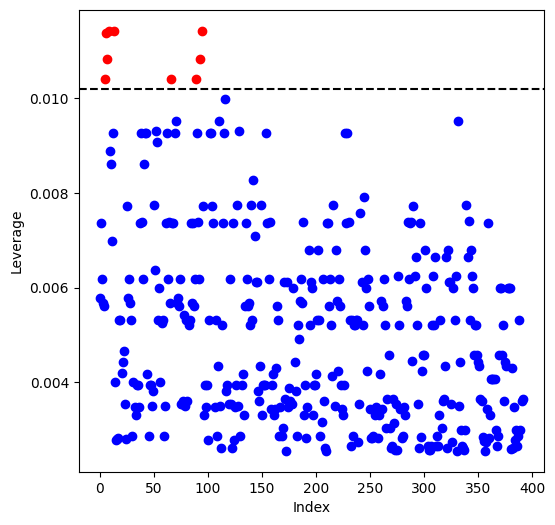

In [321]:
leverage_outlier_plot(results,2)

## 14. The collinearity problem.

In [403]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5*x1 + rng.normal(size=100)/10
y = 2 + 2*x1 + 0.3*x2 + rng.normal(size=100)

### (a) Write out the form of the linear model for $Y$

<font color='red'>
$$ Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \epsilon $$

where $\beta_0 = 2, \beta_1=2, \beta_2=0.3$
</font>

### (b) Create a scatterplot displaying the relationship between the variables.

<font color='red'>
$X_2$ is a linear combination of $X_1$ by definition.
</font>

Correlation: 0.772324


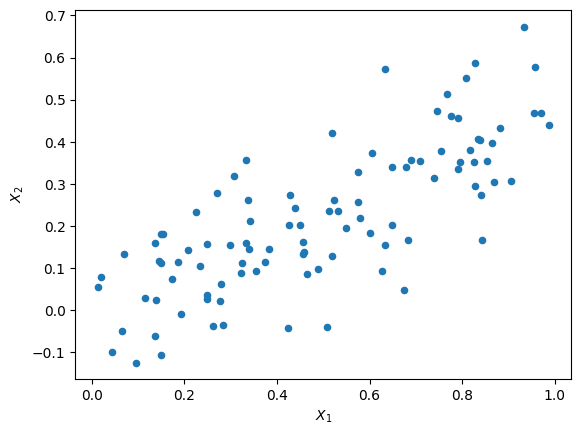

In [404]:
df = pd.DataFrame({'$Y$':y,'$X_1$':x1, '$X_2$':x2})
df.plot.scatter('$X_1$','$X_2$')
print("Correlation: %f" % np.corrcoef(x1,x2)[1][0])

### (c) Fit a lease squares regression and describe the results. 

<font color='red'>
While our coefficient estimates for $\hat{\beta}_0 = 1.96$ and $\hat{\beta}_1 = 1.62$ are reasonably close to our true model coefficients of 2 and 2 respectively, our estimate $\hat{\beta}_2 = 0.94$ is more than three times the true value of $\beta_2 = 0.3$. $H_0: \beta_2 = 0$ is the only null hypothesis here which we are unable to reject with $p$-value of $0.259$.
</font>

In [405]:
fit_model_print_results(df, ['$X_1$','$X_2$'], '$Y$')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    $Y$   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           5.76e-08
Time:                        21:46:49   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.9579      0.190     10.319      0.000       1.581       2.334
$X_1$          1.6154      0.527      3.065      0.003       0.569       2.661
$X_2$          0.9428      0.831      1.134      0.259      -0.707       2.592
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.041
Skew:                          -0.036   Prob(JB):                        0.979
Kurtosis:                       2.931   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### (d) Now fit a least squares regression to predict y using only x1. Comment on your results.

<font color='red'>
Our $R^2$ has decreased in the following model; however, our coefficient estimate is even closer to the true value of $\beta_1$. We can still reject the corresponding null hypothesis $H_0: \beta_1 = 0$.
</font>

In [406]:
fit_model_print_results(df, ['$X_1$'], '$Y$')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    $Y$   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           1.37e-08
Time:                        21:46:49   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.9371      0.189     10.242      0.000       1.562       2.312
$X_1$          2.0771      0.335      6.196      0.000       1.412       2.742
==============================================================================
Omnibus:                        0.204   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.903   Jarque-Bera (JB):                0.042
Skew:                          -0.046   Prob(JB):                        0.979
Kurtosis:                       3.038   Cond. No.                         4.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### (d) Now fit a least squares regression to predict y using only x1. Comment on your results.

<font color='red'>
Our $R^2$ has decreased as well in the following model. Our coefficient estimate is now significantly far away from the true value $\beta_2$. We can still reject the corresponding null hypothesis $H_0: \beta_2 = 0$, though.
</font>

In [407]:
fit_model_print_results(df, ['$X_2$'], '$Y$')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    $Y$   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           7.43e-07
Time:                        21:46:49   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.3239      0.154     15.124      0.000       2.019       2.629
$X_2$          2.9103      0.550      5.291      0.000       1.819       4.002
==============================================================================
Omnibus:                        0.191   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.909   Jarque-Bera (JB):                0.373
Skew:                          -0.034   Prob(JB):                        0.830
Kurtosis:                       2.709   Cond. No.                         6.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### (f) Do the results obtained in (c)–(e) contradict each other? Explain your answer.

<font color='red'>
When we only model $Y$ regressed on $X_2$, we cannot reject the null hypothesis $H_0: \beta_2 = 0$. This contradicts our model of $Y$ regressed as a linear combination of $X_1$ and $X_2$ which says we cannot reject the null hypothesis $H_0: \beta_2 = 0$.
</font>

### (g) Suppose we obtain one additional observation, which was unfortunately mismeasured (code below). Re-fit the linear models from (c) to (e) using this new data. What effect does this new observation have on the each of the models? In each model, is this observation an outlier? A high-leverage point? Both? Explain your answers.

<font color='red'>
Adding the observation below changes which null hypothesis we can reject i.e. now we cannot reject $H_0: \beta_1 = 0$ in our OLS models besides the model where $Y$ is regressed only on $X_1$. This new observation appears as an outlier seen in our leverage outlier plots for the regression models where $Y$ is regressed on both $X_1$ and $X_2$ and where $Y$ is regressed solely on $X_2$.
</font>

In [408]:
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])

                            OLS Regression Results                            
Dep. Variable:                    $Y$   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     20.17
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           4.60e-08
Time:                        21:46:52   Log-Likelihood:                -135.30
No. Observations:                 101   AIC:                             276.6
Df Residuals:                      98   BIC:                             284.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.0618      0.192     10.720      0.0

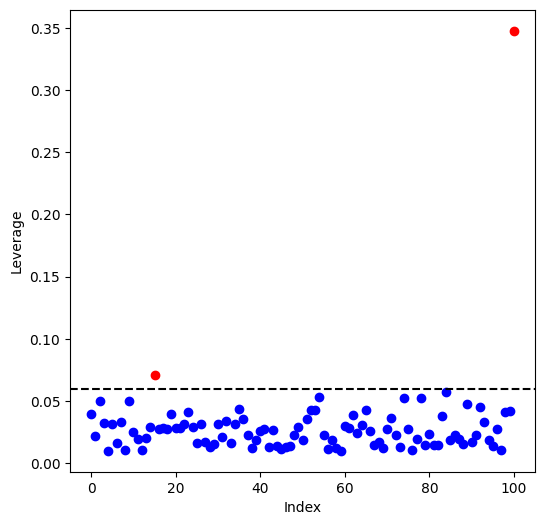

In [409]:
df = pd.DataFrame({'$Y$':y,'$X_1$':x1, '$X_2$':x2})
X = MS(['$X_1$','$X_2$']).fit_transform(df)
y = df['$Y$']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())
leverage_outlier_plot(results, 2)

                            OLS Regression Results                            
Dep. Variable:                    $Y$   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     27.42
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           9.23e-07
Time:                        21:46:54   Log-Likelihood:                -140.37
No. Observations:                 101   AIC:                             284.7
Df Residuals:                      99   BIC:                             290.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.0739      0.201     10.310      0.0

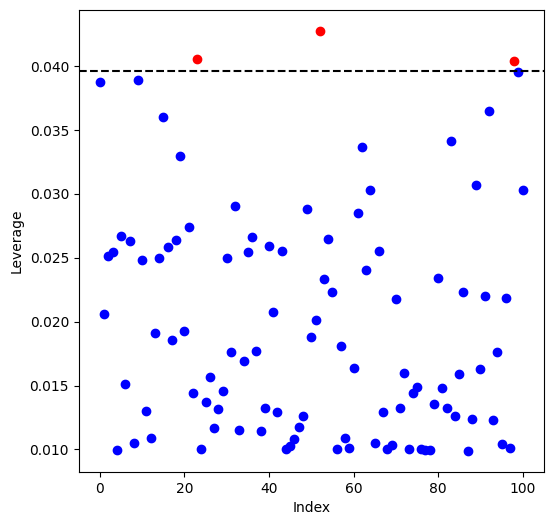

In [410]:
X = MS(['$X_1$']).fit_transform(df)
y = df['$Y$']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())
leverage_outlier_plot(results, 2)

                            OLS Regression Results                            
Dep. Variable:                    $Y$   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     36.10
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           3.13e-08
Time:                        21:46:57   Log-Likelihood:                -137.01
No. Observations:                 101   AIC:                             278.0
Df Residuals:                      99   BIC:                             283.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.2840      0.151     15.088      0.0

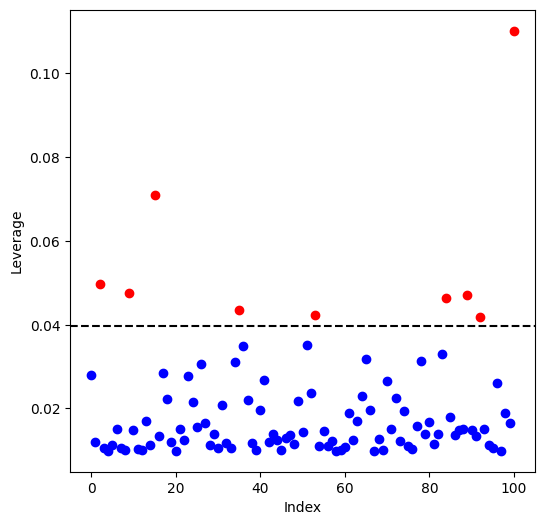

In [411]:
X = MS(['$X_2$']).fit_transform(df)
y = df['$Y$']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())
leverage_outlier_plot(results, 2)